# CONVERTIR FORMATO PANDAS

In [2]:
import os
import pandas as pd
import numpy as np
from torchvision.io import read_image
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import sklearn.model_selection
#from sklearn.model_selection import train_test_split

In [3]:
direccion_dataset = "/media/oem/FIRST/dataset/data/" #Poner la dirección del dataset aquí
nombre_archivo_atributos = "Data_Entry_2017.csv"
ruta_archivo_atributos= os.path.join(direccion_dataset, nombre_archivo_atributos)
ruta_cxr_png = os.path.join(direccion_dataset, "images/")
extension_cxr = "png"
extension_cr = "txt" 
lista_elementos_dataset = os.listdir(ruta_cxr_png) # Listar los elementos disponibles del dataset
dataset_datos_pn = pd.read_csv(ruta_archivo_atributos) #Cargar el CSV


# OBTENDO DATOS CARACTERISITICOS

In [6]:

dato_pytorch=[]
csv_reader= pd.read_csv(ruta_archivo_atributos, usecols=['Image Index','Finding Labels','Patient Gender', 'Patient Age'])

name_image="mame_image"
condition="condition"
genre="genre"
age=0
for idx, elem in enumerate (lista_elementos_dataset):
    image_index=csv_reader.loc[idx,'Image Index']
    labels_condition=csv_reader.loc[idx,'Finding Labels']
    age_index=csv_reader.loc[idx,'Patient Age']
    genre_index=csv_reader.loc[idx,'Patient Gender']
    if labels_condition == "No Finding":
        name_image=image_index
        age=age_index
        condition= "Normal"
        if genre_index =="F":
            genre= "Female"
        else:
            genre="Mawee"
    if "Pneumonia"in labels_condition:
        name_image=image_index
        age=age_index
        condition= "Pneumonia"
        if genre_index =="F":
            genre= "Female"
        else:
            genre="Male"
    dato_pytorch.append({"name_image":name_image, "condition":condition})
dataset_rx8_original=pd.DataFrame(dato_pytorch) 

# FILTRADO DATOS
 

In [7]:
dataset_rx8_filtrado=dataset_rx8_original
dataset_rx8_filtrado.loc[dataset_rx8_filtrado["condition"]== "Normal", 'condition']=0
dataset_rx8_filtrado.loc[dataset_rx8_filtrado["condition"]== "Pneumonia", 'condition']=2
#_=dataset_rx8_filtrado.pop("genre")
#_=dataset_rx8_filtrado.pop("age")

# Guardar dataset formato csv

In [8]:
dataset_rx8_original.to_csv("original_dataset_rxc8_data_norm_neumoni.csv")
dataset_rx8_filtrado.to_csv("new_dataset_rx8.csv")

# EXTRAER DATOS DE NORMAL Y NEUMONIA

In [12]:
dataset_selected_neumo= dataset_rx8_filtrado["condition"].str.contains('Pneumonia')
dataset_selected_normal= dataset_rx8_filtrado["condition"]=="Normal"

#  DIVISION DATASET SOLO IMAGENES NORMALES

In [14]:
dataset_train, dataset_test = sklearn.model_selection.train_test_split(dataset_selected_normal, train_size=0.10, test_size=0.10)
dataset_test, dataset_val = sklearn.model_selection.train_test_split(dataset_test, train_size=0.10, test_size=0.10)


# OBTENGO NUEVA DIRECCION CSV FILTRADO


In [39]:
name_file_new_atributo_original="new_dataset_rx8.csv"

# CUSTOM CREATING DATSET FROMAT PYTOCH

In [40]:
class CreatingDataset(Dataset):
    def __init__(self, name_file_new_atributo_original, ruta_cxr_png, transform=None, target_transform=None):
        self.img_labels = dataset_datos_pn
        self.img_dir = ruta_cxr_png
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

In [41]:
labels_map = {
    0: "Normal",
    1: "Tuberculosis",
    2: "Neumonia",
    3: "Covid"
}
train_DataSet_cxr=CreatingDataset(dataset_train, ruta_cxr_png, transform=None)


In [42]:
from torchvision.transforms import Resize #Cargar herramienta para hacer resize y grayscale
from torchvision.transforms import Compose
resize_transform = Resize((1024,1024)) #Cambiar el tamaño a 1024x1024
transformaciones_dataset = Compose([resize_transform]) #Apila las transformaciones
train_DatasetRXC_8_torch = CreatingDataset(dataset_train, ruta_cxr_png, transformaciones_dataset)
test_DatasetRXC_8_torch = CreatingDataset(dataset_test, ruta_cxr_png, transformaciones_dataset)
val_DatasetRXC_8_torch = CreatingDataset(dataset_val, ruta_cxr_png, transformaciones_dataset)



In [43]:
from torch.utils.data import DataLoader
train_dataloader = DataLoader(train_DataSet_cxr, batch_size=64, shuffle=True)
test_dataloader=DataLoader(train_DataSet_cxr, batch_size=64, shuffle=True)
val_dataloader=DataLoader(train_DataSet_cxr, batch_size=64, shuffle=True)

 # Iterate through the DataLoader

Feature batch shape: torch.Size([64, 1, 1024, 1024])
Labels batch shape: ('Nodule', 'Cardiomegaly|Effusion|Infiltration', 'No Finding', 'No Finding', 'Consolidation', 'No Finding', 'Effusion|Nodule|Pleural_Thickening', 'No Finding', 'No Finding', 'Infiltration', 'No Finding', 'Atelectasis|Effusion|Infiltration', 'No Finding', 'No Finding', 'No Finding', 'Infiltration', 'No Finding', 'Infiltration', 'Infiltration', 'No Finding', 'No Finding', 'Atelectasis|Effusion', 'Effusion|Infiltration', 'No Finding', 'No Finding', 'Nodule', 'No Finding', 'No Finding', 'Atelectasis|Effusion|Pleural_Thickening', 'Nodule|Pleural_Thickening', 'Infiltration', 'No Finding', 'Infiltration', 'Atelectasis|Consolidation', 'Pleural_Thickening', 'No Finding', 'Consolidation', 'Infiltration', 'No Finding', 'No Finding', 'No Finding', 'Effusion', 'No Finding', 'Pneumonia', 'No Finding', 'No Finding', 'Pneumothorax', 'No Finding', 'No Finding', 'Emphysema', 'No Finding', 'No Finding', 'No Finding', 'No Finding', '

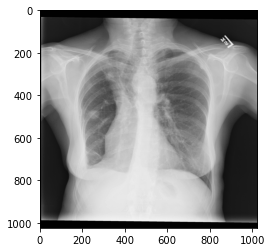

Label: Nodule


In [44]:
# Display image and label.
train_features_dataset, train_labels_dataset = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features_dataset.size()}")
print(f"Labels batch shape: {train_labels_dataset}")
img = train_features_dataset[0].squeeze()
label = train_labels_dataset[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")


In [45]:
test_dataloader

In [46]:
val_dataloader